In [ ]:
pip install finance-datareader

In [ ]:
pip install mplfinance

In [ ]:
import mplfinance as mpf
from datetime import datetime
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import linregress

In [ ]:
df = fdr.DataReader('004000', '2021-06-13', '2021-09-13')
df_drop = df['Open'].isin([0])
df = df[~df_drop]
df['idx'] = [j for j in range(len(df))]

scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])
df

,Open,High,Low,Close,Volume,Change,idx
Date,,,,,,,
2021-06-14,0.129555,0.156134,0.156627,0.161172,0.171782,0.548423,0.000000
2021-06-15,0.157895,0.141264,0.140562,0.124542,0.182482,0.166599,0.015625
2021-06-16,0.113360,0.118959,0.148594,0.124542,0.007255,0.295777,0.031250
2021-06-17,0.105263,0.089219,0.128514,0.091575,0.052116,0.177745,0.046875
2021-06-18,0.089069,0.100372,0.120482,0.084249,0.055698,0.269183,0.062500
...,...,...,...,...,...,...,...
2021-09-07,0.502024,0.468401,0.473896,0.406593,0.388717,0.463295,0.937500
2021-09-08,0.453441,0.650558,0.497992,0.626374,0.952435,1.000000,0.953125
2021-09-09,0.688259,0.817844,0.730924,0.758242,0.893279,0.686341,0.968750


In [ ]:
df['7'] = df['Close'].rolling(window=20).mean() # 5평선 2평선
df['3'] = df['Close'].rolling(window=5).mean()
df

,Open,High,Low,Close,Volume,Change,idx,7,3
Date,,,,,,,,,
2021-06-14,0.129555,0.156134,0.156627,0.161172,0.171782,0.548423,0.000000,NaN,NaN
2021-06-15,0.157895,0.141264,0.140562,0.124542,0.182482,0.166599,0.015625,NaN,NaN
2021-06-16,0.113360,0.118959,0.148594,0.124542,0.007255,0.295777,0.031250,NaN,NaN
2021-06-17,0.105263,0.089219,0.128514,0.091575,0.052116,0.177745,0.046875,NaN,NaN
2021-06-18,0.089069,0.100372,0.120482,0.084249,0.055698,0.269183,0.062500,NaN,0.117216
...,...,...,...,...,...,...,...,...,...
2021-09-07,0.502024,0.468401,0.473896,0.406593,0.388717,0.463295,0.937500,0.234432,0.337729
2021-09-08,0.453441,0.650558,0.497992,0.626374,0.952435,1.000000,0.953125,0.252381,0.402198
2021-09-09,0.688259,0.817844,0.730924,0.758242,0.893279,0.686341,0.968750,0.277473,0.493040


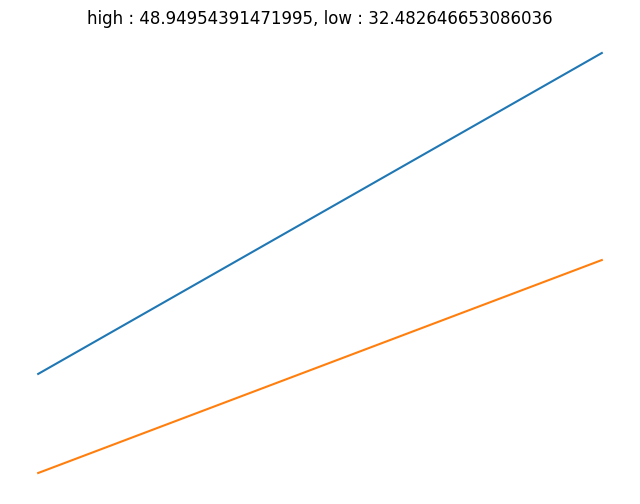

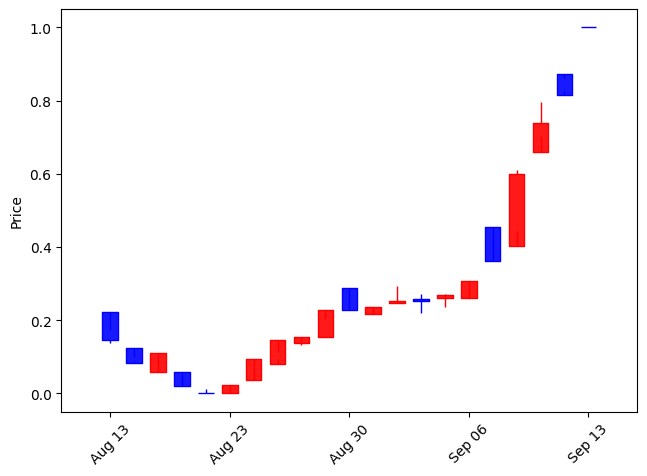

In [ ]:
df_len = len(df)
df_high = df.copy()
df_low = df.copy()

while len(df_high)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_high['idx'], y=df_high['High'])
    df_high = df_high.loc[df_high['High'] > slope * df_high['idx'] + intercept]

slope, intercept, r_value, p_value, std_err = linregress(x=df_high['idx'], y=df_high['Close'])
df['Uptrend'] = slope * df['idx'] + intercept


high_deg = math.degrees(slope)


while len(df_low)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_low['idx'], y=df_low['Low'])
    df_low = df_low.loc[df_low['Low'] < slope * df_low['idx'] + intercept]

slope, intercept, r_value, p_value, std_err = linregress(x=df_low['idx'], y=df_low['Close'])
df['Downtrend'] = slope * df['idx'] + intercept
low_deg = math.degrees(slope)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df.idx, df.Uptrend, label="uptrend")
ax.plot(df.idx, df.Downtrend, label="downtrend")
ax.axis('off')

plt.title(f'high : {high_deg}, low : {low_deg}')
plt.grid()
plt.show()

kwargs=dict(type='candle')
mc=mpf.make_marketcolors(up='red', down='blue', inherit=True)
style_final=mpf.make_mpf_style(marketcolors=mc)

mpf.plot(df, **kwargs, style=style_final)